In [8]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LOAD DATASET

In [9]:
test_unknown_data_path = './data/2_rf_test_unknown_data.csv'
test_unknown_data = pd.read_csv(test_unknown_data_path)

test_unknown_label_path = './data/2_rf_test_unknown_label.csv'
test_unknown_label = pd.read_csv(test_unknown_label_path)

In [10]:
# Display column names
print("Column names:")
print(test_unknown_data.columns)

# Display dataset shape
print("\nDataset shape:")
print(test_unknown_data.shape)


Column names:
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'],
      dtype='object')

Dataset shape:
(5728, 46)


# USING ELBOW METHOD TO FIND OPTIMUM K VALUE

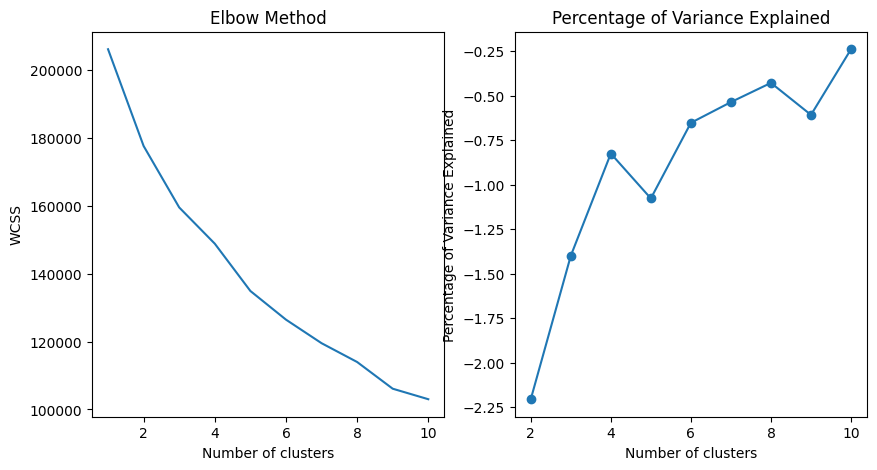

In [87]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'test_unknown_data' is your dataset
data = test_unknown_data

# Step 4: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: Choose the Number of Clusters (K)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Calculate the percentage of variance explained
percentage_var_explained = np.diff(wcss) / np.sum(wcss[:-1]) * 100

# Plotting the elbow graph with the percentage of variance explained
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), percentage_var_explained, marker='o')
plt.title('Percentage of Variance Explained')
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of Variance Explained')
plt.show()


# FINDING Silhouette Score AND PLOTTING

Silhouette Score: 0.20299522325835226


C:\Users\JUI BANGALI\AppData\Local\Temp\ipykernel_15200\2335598788.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(range(len(test_cluster_labels)), test_cluster_labels, cmap='viridis', marker='o')


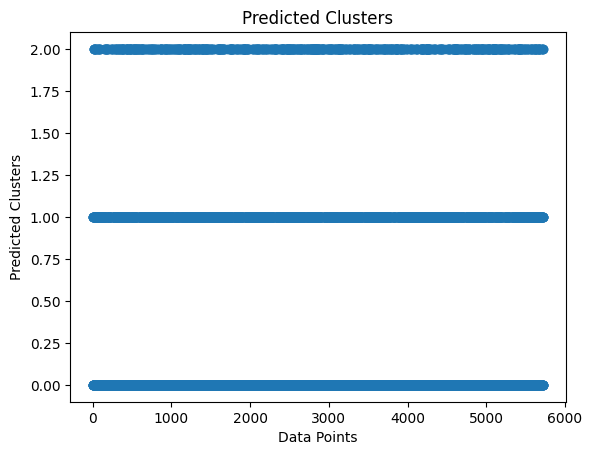

In [90]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Drop the 'Cluster' column if it exists
data_for_scaling = data.drop('Cluster', axis=1, errors='ignore')

# Step 4: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_scaling)

# Manually set the optimal number of clusters based on the elbow method
your_optimal_k = 3

# Fit K-Means model to the training data
kmeans = KMeans(n_clusters=your_optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=2)
kmeans.fit(scaled_data)

# Assuming your test data has the same features as the training data
scaled_test_data = scaler.transform(data_for_scaling)

# Predict the clusters for the test data
test_cluster_labels = kmeans.predict(scaled_test_data)

# Silhouette Score for clustering evaluation
silhouette_avg = silhouette_score(scaled_test_data, test_cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Plotting predicted clusters
plt.scatter(range(len(test_cluster_labels)), test_cluster_labels, cmap='viridis', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Predicted Clusters')
plt.title('Predicted Clusters')
plt.show()


# PERFORM KMEANS AND PLOT PCA

C:\Users\JUI BANGALI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


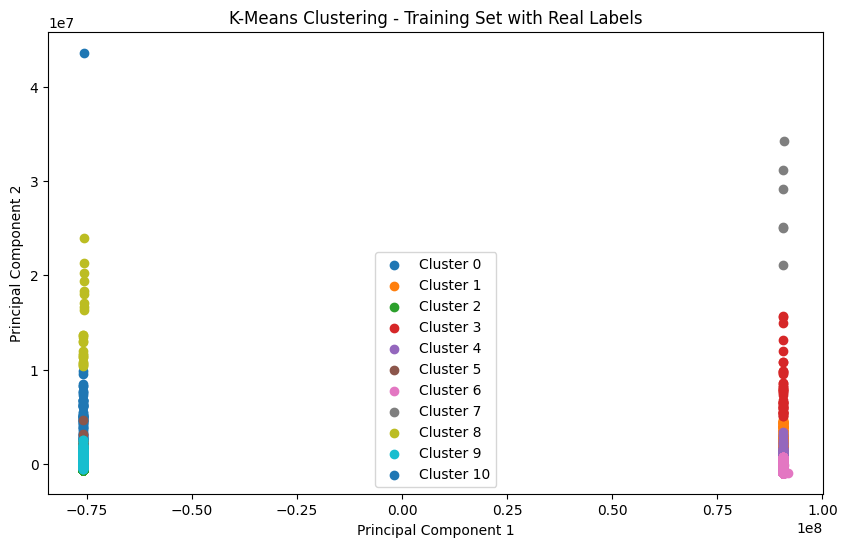

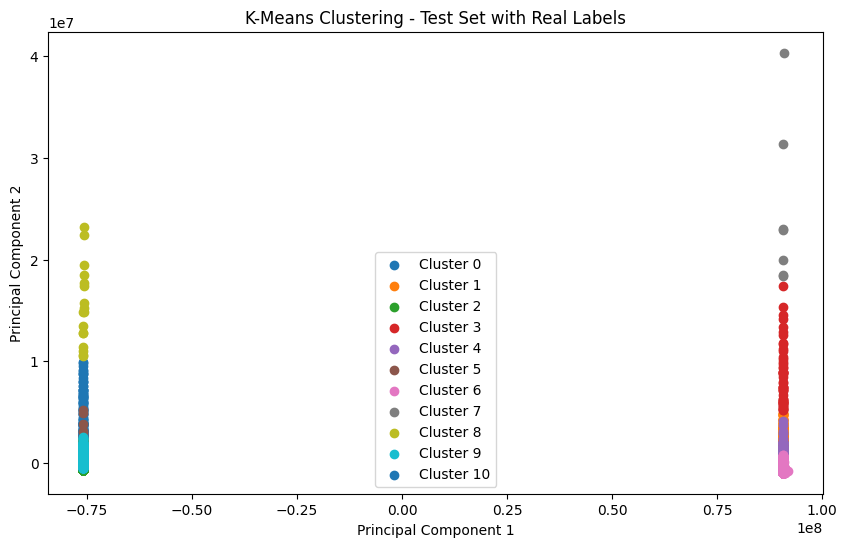

In [131]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

test = './data/testing_data.csv'
test_data = pd.read_csv(test)

test_L = './data/testing_lable.csv'
test_L_data = pd.read_csv(test_L)

# Assuming 'test_unknown_data' is your dataset
# and 'test_unknown_label' is your label
X = test_unknown_data
y = test_unknown_label['label'] 

# Apply label encoding to the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

X_train = X
y_train = y

X_test = test_data
y_test = test_L_data

# Specify the number of clusters
number_of_clusters = 11

# Apply k-means clustering on the training set
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
train_predicted_labels = kmeans.fit_predict(X_train)

# Apply the clustering model to the test set
test_predicted_labels = kmeans.predict(X_test)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Scatter plot for training set with real labels
plt.figure(figsize=(10, 6))
for cluster in range(number_of_clusters):
    cluster_mask = (train_predicted_labels == cluster)
    plt.scatter(X_train_reduced[cluster_mask, 0], X_train_reduced[cluster_mask, 1], label=f'Cluster {cluster}')

plt.title('K-Means Clustering - Training Set with Real Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Scatter plot for test set with real labels
plt.figure(figsize=(10, 6))
for cluster in range(number_of_clusters):
    cluster_mask = (test_predicted_labels == cluster)
    plt.scatter(X_test_reduced[cluster_mask, 0], X_test_reduced[cluster_mask, 1], label=f'Cluster {cluster}')

plt.title('K-Means Clustering - Test Set with Real Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# PERFORM K MEANS AND PLOT KMEANS RESULTS

C:\Users\JUI BANGALI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


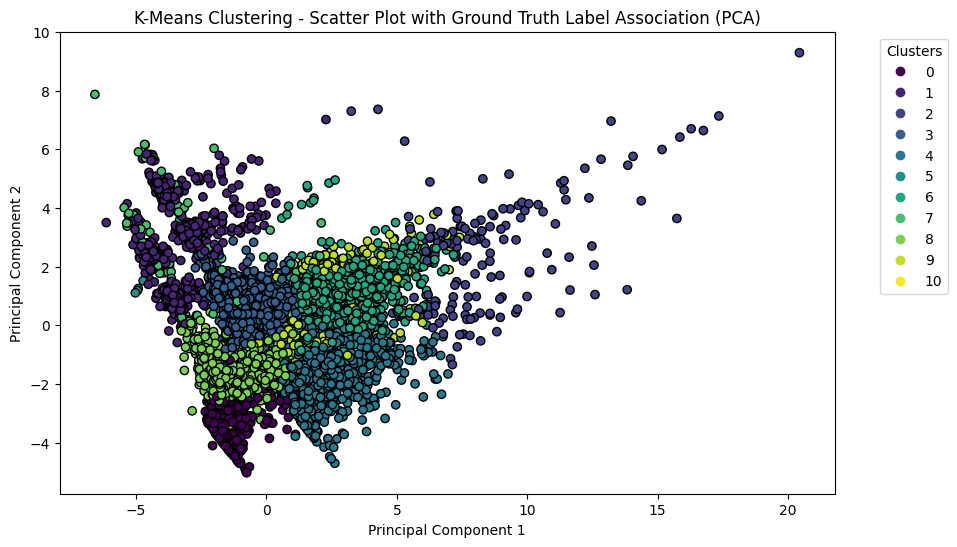

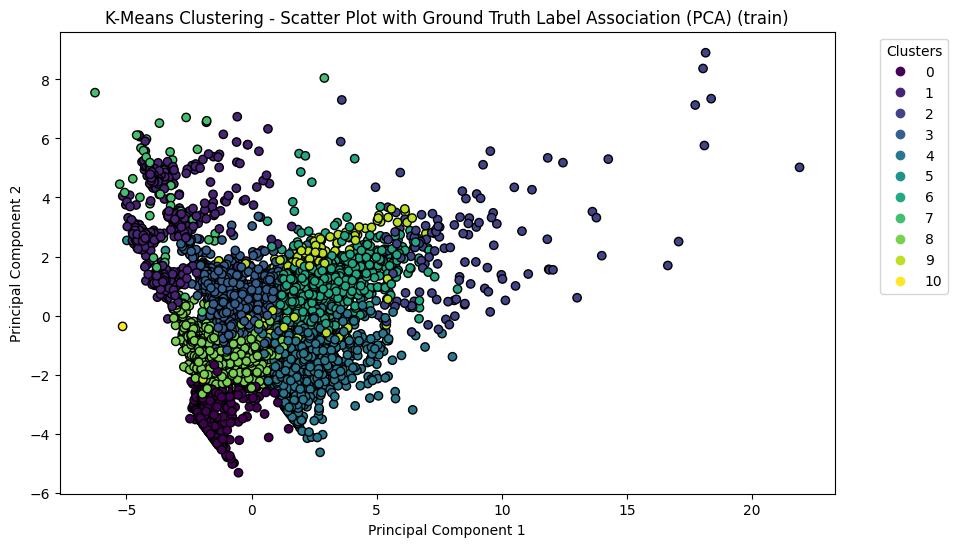

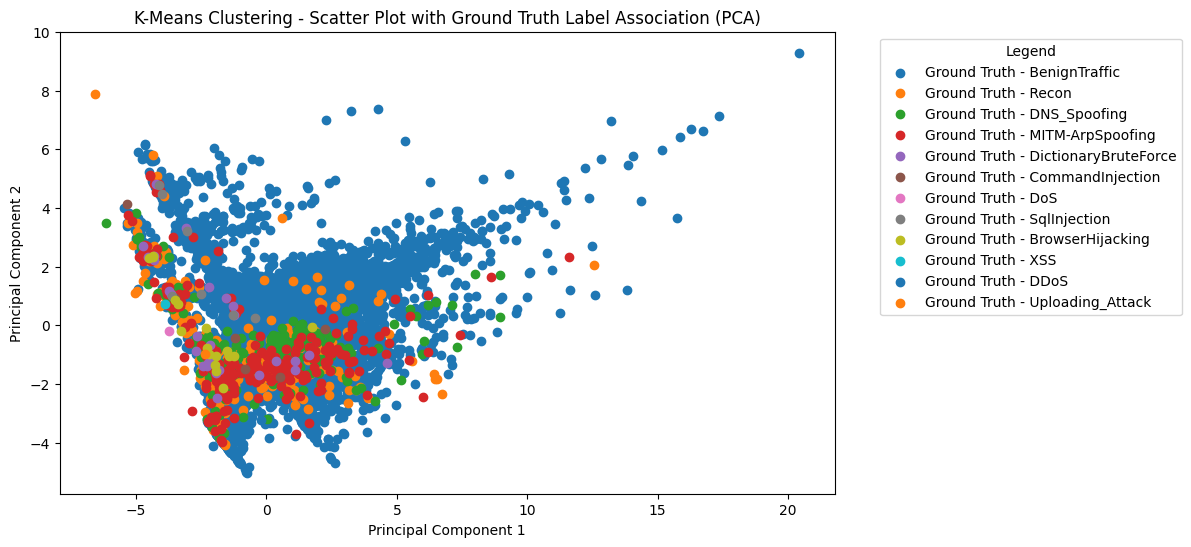

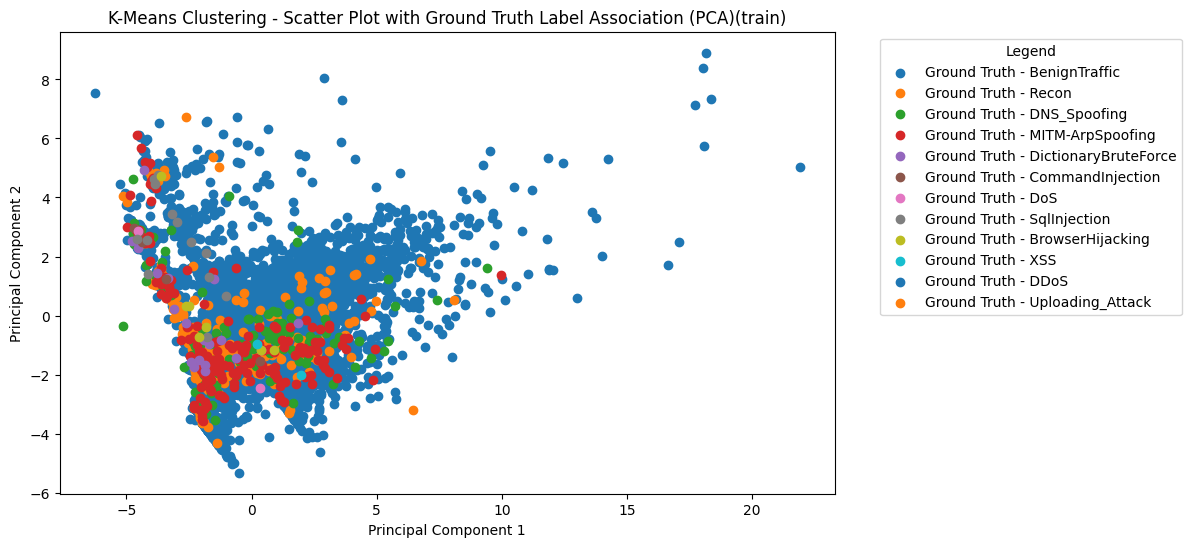

In [135]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

X = X_test
y_true = y_test['label']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_train = scaler.fit_transform(X_train)

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_train = pca.fit_transform(X_scaled_train)

# Apply k-means clustering on the reduced dataset

# MAIN CHANGE!!
number_of_clusters = 11
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
predicted_labels_train_data = kmeans.fit(X_scaled_train)
predicted_labels_train = kmeans.predict(X_scaled_train)
predicted_labels = kmeans.predict(X_scaled)

# Create a DataFrame to store the association between clusters and ground truth labels
cluster_label_association = pd.DataFrame({'Cluster': predicted_labels, 'Ground Truth Label': y_true})
cluster_label_association_train = pd.DataFrame({'Cluster': predicted_labels_train, 'Ground Truth Label': y})

# Plot the association using a scatter plot
plt.figure(figsize=(10, 6))

# Plot data points without label names
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', marker='o', edgecolors='k', label='Clustered Data')

# Create a legend with cluster numbers
legend_labels = list(range(number_of_clusters))
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('K-Means Clustering - Scatter Plot with Ground Truth Label Association (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# Plot the association using a scatter plot
plt.figure(figsize=(10, 6))

# Plot data points without label names
scatter = plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=predicted_labels_train, cmap='viridis', marker='o', edgecolors='k', label='Clustered Data')

# Create a legend with cluster numbers
legend_labels = list(range(number_of_clusters))
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('K-Means Clustering - Scatter Plot with Ground Truth Label Association (PCA) (train)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# Plot the association using a scatter plot
plt.figure(figsize=(10, 6))

# Iterate over unique ground truth labels
for label in y_true.unique():
    indices = cluster_label_association[cluster_label_association['Ground Truth Label'] == label].index
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Ground Truth - {label}')

# Add legend
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('K-Means Clustering - Scatter Plot with Ground Truth Label Association (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# Plot the association using a scatter plot
plt.figure(figsize=(10, 6))

# Iterate over unique ground truth labels
for label in y_true.unique():
    indices = cluster_label_association_train[cluster_label_association_train['Ground Truth Label'] == label].index
    plt.scatter(X_pca_train[indices, 0], X_pca_train[indices, 1], label=f'Ground Truth - {label}')

# Add legend
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('K-Means Clustering - Scatter Plot with Ground Truth Label Association (PCA)(train)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


# FIND FPR BY CONSIDERING BENIGN AS POSITIVE LABEL

In [136]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# Assuming 'test_unknown_label' is your true labels
y_true = y_test['label']

# Define the positive class
positive_class = 'BenignTraffic'

# Create binary labels for the positive class
y_binary = (y_true == positive_class).astype(int)

# Evaluate K-means performance using confusion matrix
conf_matrix = confusion_matrix(y_binary, predicted_labels)

# Extract unique class labels (excluding the positive class)
unique_labels = pd.Series(y_true.unique()).loc[lambda x: x != positive_class].tolist()

# Calculate False Positives and True Negatives for the positive class against every other class
false_positives = {}
true_negatives = {}
for i, label in enumerate(unique_labels, start=0):
    false_positives[label] = conf_matrix[i, 0]
    true_negatives[label] = conf_matrix[0, i + 1:].sum() + conf_matrix[i + 1:, i + 1:].sum()

# Calculate False Positive Rate for the positive class against every other class
fpr = {}
for label in unique_labels:
    denominator = false_positives[label] + true_negatives[label]
    # Handle the case where both False Positives and True Negatives are zero
    fpr[label] = false_positives[label] / denominator if denominator != 0 else 0

print(f"False Positive Rate for class '{positive_class}' against every other class:")
for label, fpr_value in fpr.items():
    print(f"Class '{label}': {fpr_value}")


False Positive Rate for class 'BenignTraffic' against every other class:
Class 'Recon': 0.007543753771876886
Class 'DNS_Spoofing': 0.42782152230971127
Class 'MITM-ArpSpoofing': 0.0
Class 'DictionaryBruteForce': 0.0
Class 'CommandInjection': 0.0
Class 'DoS': 0.0
Class 'SqlInjection': 0.0
Class 'BrowserHijacking': 0.0
Class 'XSS': 0.0
Class 'DDoS': 0.0
Class 'Uploading_Attack': 0


In [137]:
cluster_label_association

,Cluster,Ground Truth Label
0,3,BenignTraffic
1,8,Recon
2,4,BenignTraffic
3,8,BenignTraffic
4,8,BenignTraffic
...,...,...
7112,1,BenignTraffic
7113,3,BenignTraffic
7114,0,BenignTraffic
7115,8,BenignTraffic


In [138]:
cluster_label_association_train

,Cluster,Ground Truth Label
0,6,BenignTraffic
1,3,BenignTraffic
2,3,BenignTraffic
3,6,BenignTraffic
4,4,BenignTraffic
...,...,...
5723,4,BenignTraffic
5724,1,Recon
5725,1,BenignTraffic
5726,3,BenignTraffic


In [139]:
cluster_gtl_counts = cluster_label_association.groupby('Cluster')['Ground Truth Label'].value_counts().unstack(fill_value=0)

In [140]:
cluster_gtl_counts_train = cluster_label_association_train.groupby('Cluster')['Ground Truth Label'].value_counts().unstack(fill_value=0)

In [141]:
print(cluster_gtl_counts)
print(cluster_gtl_counts_train)

Ground Truth Label  BenignTraffic  BrowserHijacking  CommandInjection  DDoS  \
Cluster                                                                       
0                             489                 0                 0     0   
1                             783                 5                 2     0   
2                             145                 0                 0     0   
3                            1357                 0                 0     0   
4                             830                 1                 0     0   
5                               1                 0                 0     0   
6                            1148                 0                 0     0   
7                              59                 0                 0     0   
8                            1188                11                 2     1   
9                             216                 0                 2     0   
10                              0                 0 

In [142]:
cluster_b_ratio = (cluster_gtl_counts['BenignTraffic'] / cluster_gtl_counts.sum(axis=1)).fillna(0)

print(cluster_b_ratio)

cluster_b_ratio_train = (cluster_gtl_counts_train['BenignTraffic'] / cluster_gtl_counts_train.sum(axis=1)).fillna(0)

print(cluster_b_ratio_train)

Cluster
0     0.907236
1     0.798980
2     0.923567
3     0.990511
4     0.846939
5     0.250000
6     0.988803
7     0.921875
8     0.750948
9     0.776978
10    0.000000
dtype: float64
Cluster
0     0.911894
1     0.811518
2     0.953846
3     0.991007
4     0.853369
5     0.666667
6     0.986006
7     0.851852
8     0.780228
9     0.818182
10    0.000000
dtype: float64
